# Test de l'opérateur ProblemDiscontinuEcomme3D

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
n_lim = 10**9
t_fin_lim = 0.2

In [4]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_sans_conv = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.0 * 10**-5, schema="quick", time_scheme="euler", phy_prop=phy_prop, cfl=0.5
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

dt fourier
4.0888316389624144e-06
Db / dx = 39
dt fourier
4.0888316389624144e-06
Db / dx = 39
Ti
ESP sans correction flux


<IPython.core.display.Javascript object>


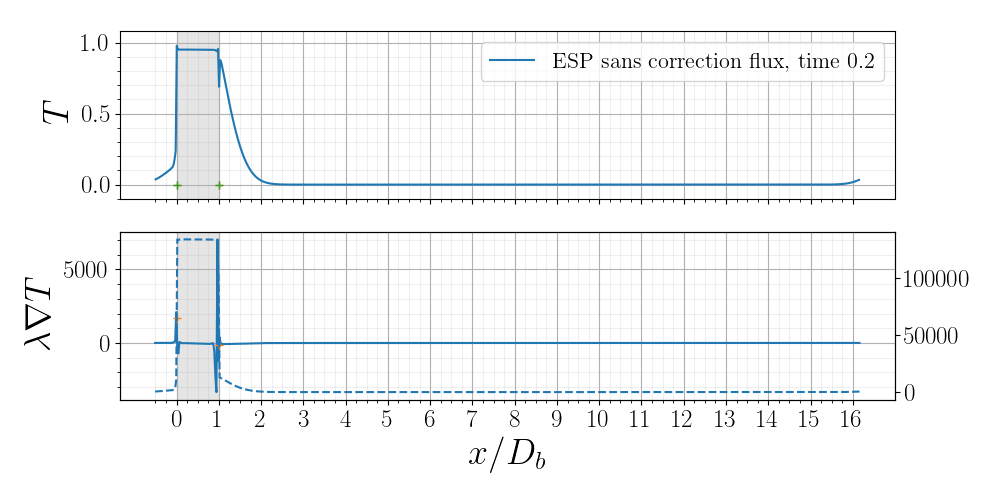

<IPython.core.display.Javascript object>


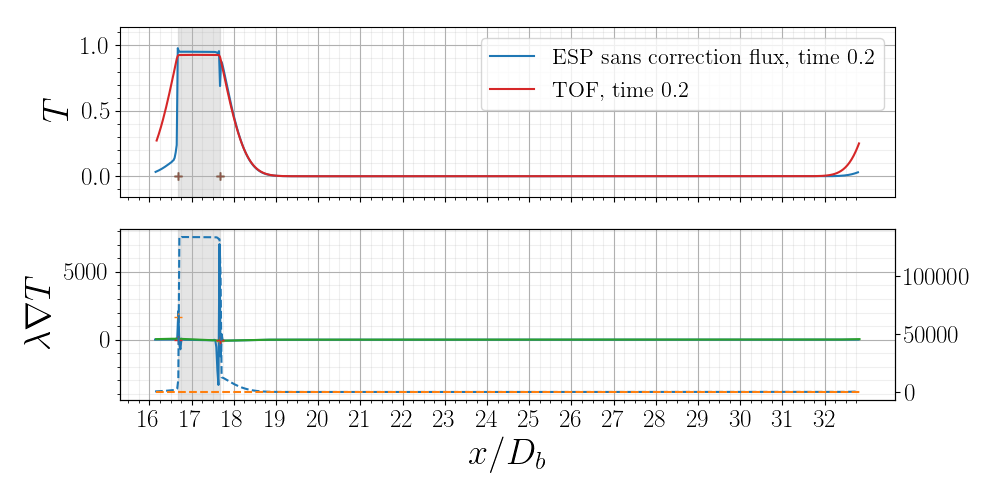

TOF


<IPython.core.display.Javascript object>


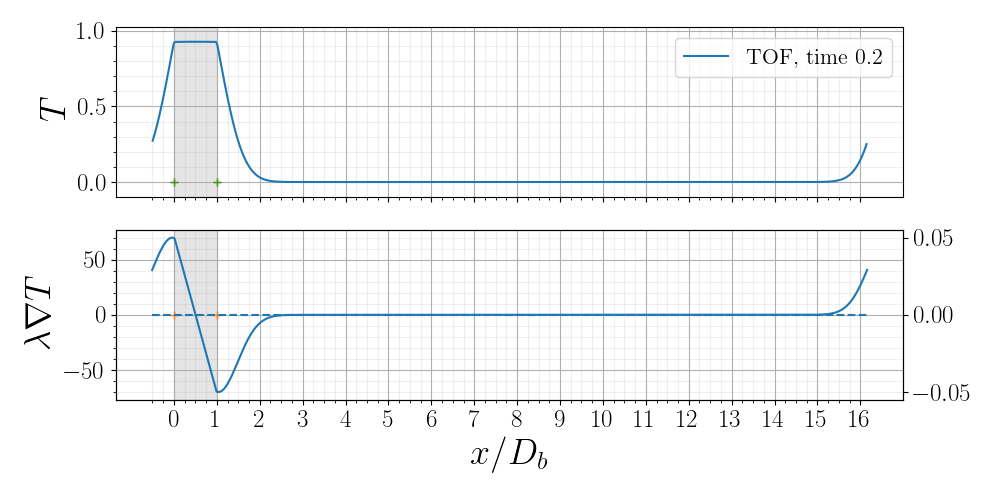

<IPython.core.display.Javascript object>


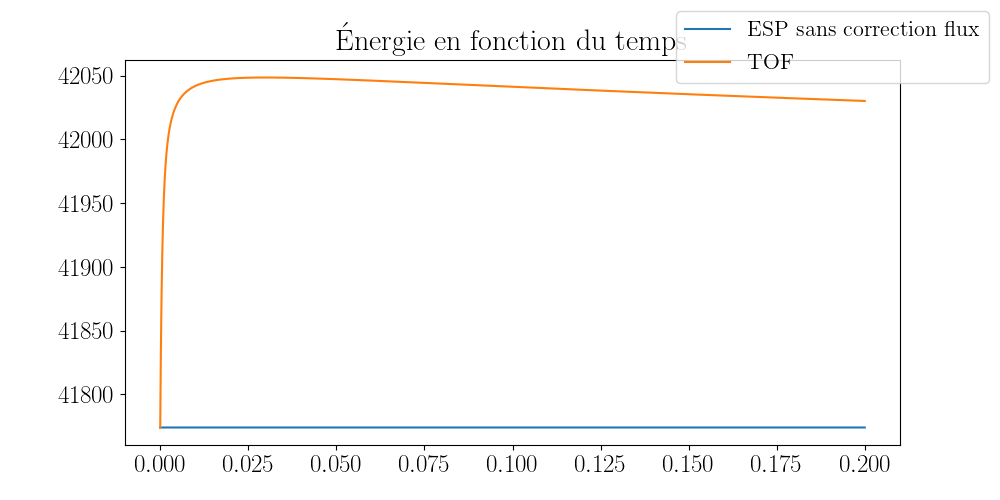

dE*/dt* = 4.24485e-21


In [9]:
t_fin = 0.2
prob_ref = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_sans_conv, num_prop=num_prop
)
prob = ProblemDiscontinuEcomme3D(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti",
)

plot_tot = Plotter("decale", flux_conv=True, lda_gradT=True)

E0 = prob.energy
print(prob.name)
print("==========================")
plot_1 = Plotter("classic", flux_conv=True, lda_gradT=True)
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot_1, plot_tot]
)

print(prob_ref.name)
print("==========================")
plot_2 = Plotter("classic", flux_conv=True, lda_gradT=True)
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot_2, plot_tot]
)


fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

## Comme 3D avec Ghost cell

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en Quick avec Euler explicite en temps.

In [14]:
n_lim = 1 * 10**6
t_fin_lim = 2.0

In [15]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_sans_conv = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=4.0 * 10**-5, schema="quick", time_scheme="euler", phy_prop=phy_prop, cfl=1.0
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.0001)

init_params_ref = {
    "markers": markers,
    "phy_prop": phy_prop_sans_conv,
    "num_prop": num_prop,
}
init_params = {"markers": markers, "phy_prop": phy_prop, "num_prop": num_prop}

In [16]:
prob_ref = Problem(
    get_T_creneau,
    **init_params_ref,
)
prob = ProblemDiscontinuEcomme3D_ghost(
    get_T_creneau,
    **init_params,
    interp_type="Ti",
    conv_interf="quick_ghost",
)
prob_bis = ProblemDiscontinuEcomme3D_ghost(
    get_T_creneau,
    **init_params,
    interp_type="Ti",
    conv_interf="quick_upwind_ghost",
)
prob_q = ProblemDiscontinuEcomme3Davecq_ghost(
    get_T_creneau,
    **init_params,
    interp_type="Ti",
    conv_interf="quick_ghost",
)

prob1 = ProblemDiscontinuE(
    get_T_creneau,
    **init_params,
    interp_type="Ti",
)

prob2 = ProblemDiscontinuEsansq(
    get_T_creneau, 
    **init_params, 
    interp_type="Ti",
)


E0 = prob.energy

dt fourier
7.283608525474248e-07
Db / dx = 29
dt fourier
7.283608525474248e-07
Db / dx = 29
Ti
dt fourier
7.283608525474248e-07
Db / dx = 29
Ti
dt fourier
7.283608525474248e-07
Db / dx = 29
Ti
dt fourier
7.283608525474248e-07
Db / dx = 29
Ti
dt fourier
7.283608525474248e-07
Db / dx = 29
Ti


Les méthodes fonctionnent de la manière suivante :

- **Problem** :  
    Il s'agit de la référence, TOF sans convection.

- **ProblemDiscontinuComme3D_ghost** :  
    On utilise les valeurs ghosts de la maille diphasique pour corriger les flux convectifs à proximité de
  l'interface (dans le stencil du quick).
    Au corrige donc les flux en $i-1/2$, $i+1/2$ et $i+3/2$.
    Deux choix ont été implémentés :
    - On utilise quick pour $i-1/2$ et $i+3/2$ avec la valeur ghost gauche et droite resp., et une interpolation upwind avec $T_I$ et $\nabla T_{I_{droit}}$ pour $i+1/2$
    - On utilise upwind pour tous
- **ProblemDiscontinuComme3Davecq_ghost** :  
    C'est la meme chose mais on corrige aussi le flux diffusif avec les valeurs de température ghost.
    


TOF
===


<IPython.core.display.Javascript object>


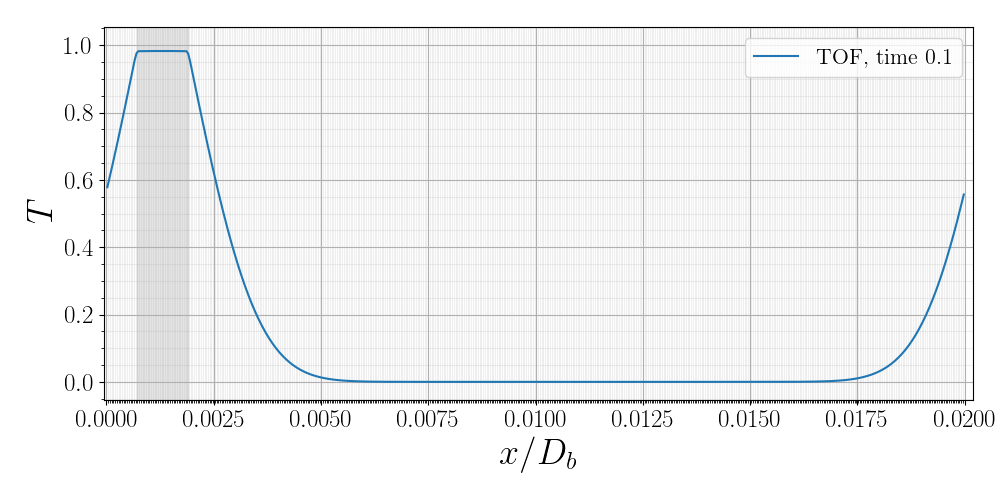

<IPython.core.display.Javascript object>


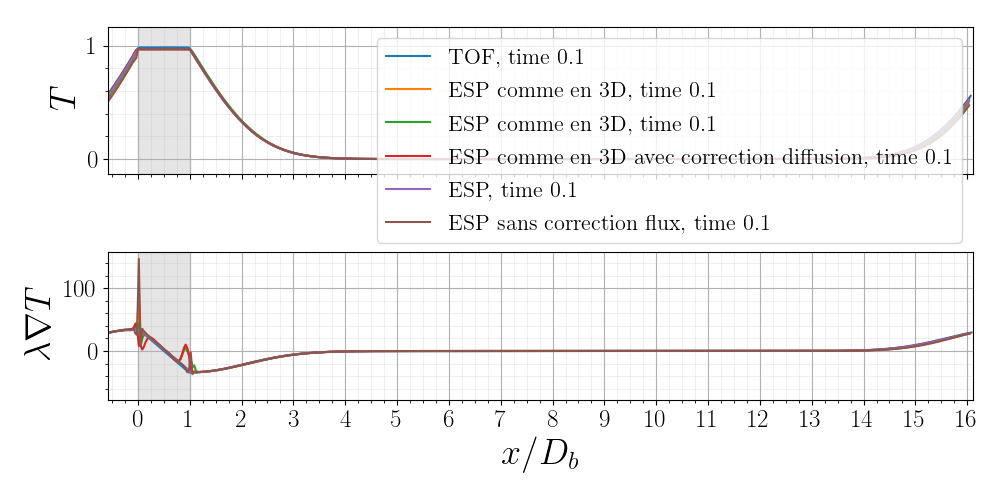


ESP comme en 3D


<IPython.core.display.Javascript object>


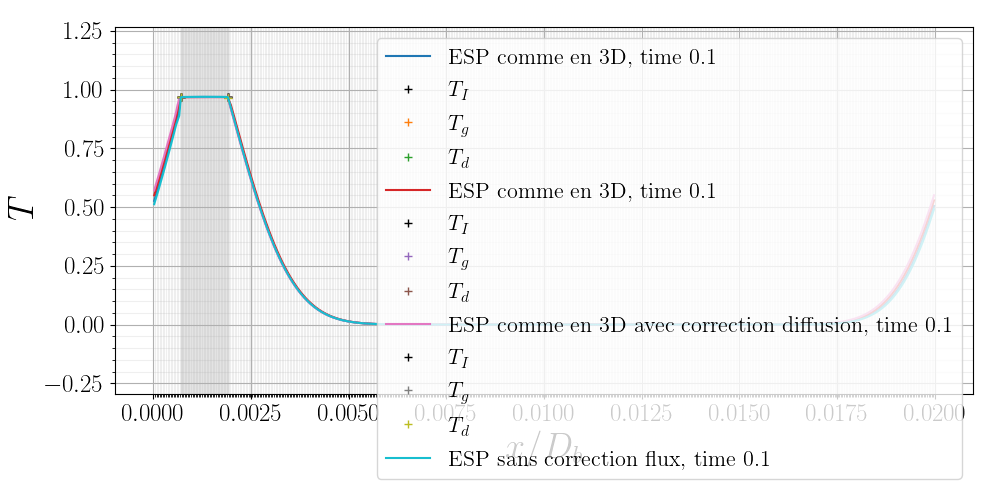


ESP comme en 3D

ESP comme en 3D avec correction diffusion

ESP
===


<IPython.core.display.Javascript object>


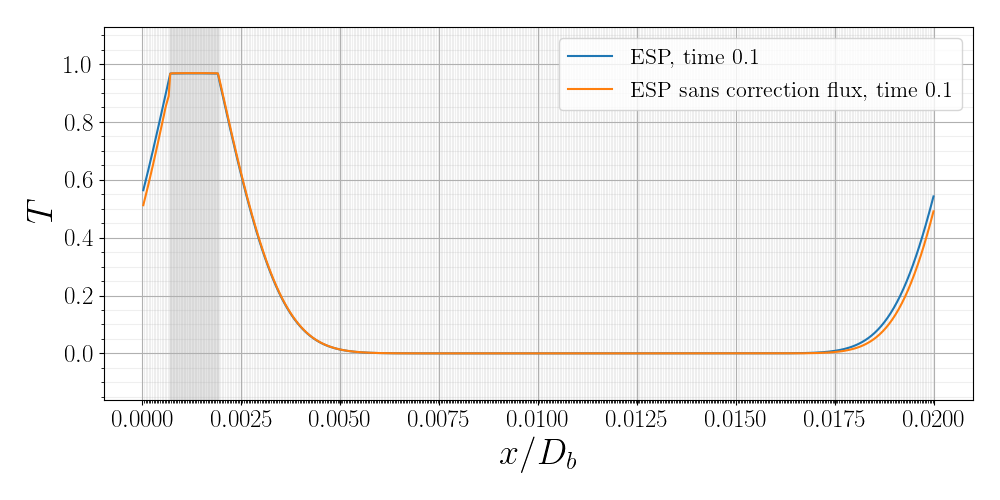


ESP sans correction flux


In [17]:
t_fin = 0.1

plot_tot = Plotter("decale", flux_conv=False, lda_gradT=True)
plot_2 = Plotter("classic", flux_conv=False, lda_gradT=False, ispretty=False)
plot_3 = Plotter("classic", flux_conv=False, lda_gradT=False, ispretty=False)

time_args = {"t_fin": min(t_fin, t_fin_lim), "n": n_lim, "number_of_plots": 1}

t_ref, e_ref = prob_ref.timestep(
    **time_args,
    plotter=[plot_tot],
)

t, e = prob.timestep(
    **time_args,
    plotter=[plot_2, plot_tot],
    plot_Ti=True,
)

tbis, ebis = prob_bis.timestep(
    **time_args,
    plotter=[plot_2, plot_tot],
    plot_Ti=True,
)

tacq, eacq = prob_q.timestep(
    **time_args,
    plotter=[plot_2, plot_tot],
    plot_Ti=True,
)

t1, e1 = prob1.timestep(
    **time_args,
    plotter=[plot_3, plot_tot],
)

t2, e2 = prob2.timestep(
    **time_args,
    plotter=[plot_2, plot_3, plot_tot],
)

<IPython.core.display.Javascript object>


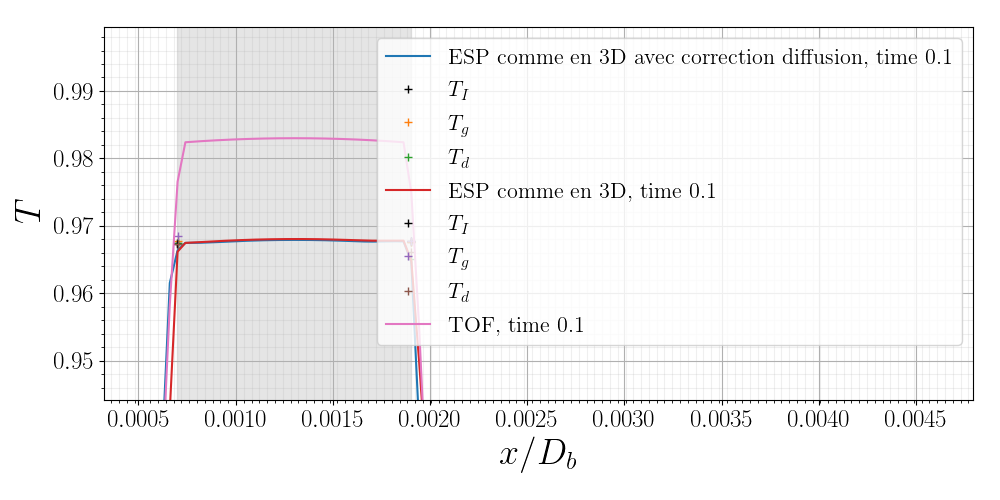

In [25]:
plot_3 = Plotter("classic", flux_conv=False, lda_gradT=False, ispretty=False)
plot_3.plot(prob_q, plot_Ti=True)
plot_3.plot(prob_bis, plot_Ti=True)
plot_3.plot(prob_ref)

On observe les choses suivantes :
- La différence entre ESP3D quick et ESP3D upwind est minime, on implémentera donc plutôt la version upwind.
- ESP sans corriger le flux diffusif ne donne pas la meme erreur que celle qu'on observe avec ESP3D, je suppose que cette différence vient plutôt de la non intégration exacte en temps de $\rho C_p$ qui est intégré en Crank-Nicolson ($n+ \frac{1}{2}$).
- La version ESP3D avec correction des flux avec différence centrée en utilisant les valeurs ghost droites et gauches ne donne pas de meilleurs résultats que sans cette correction. Pas d'implémentation en 3D donc.

In [ ]:
en_plot = EnergiePlot()
en_plot.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)
en_plot.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
en_plot.plot(tbis, ebis / (0.02 * 0.005 * 0.005), label=prob_bis.name)
en_plot.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob1.name)
en_plot.add_E0()